In [39]:
# Start writing code here...
# import

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from sklearn.cluster import KMeans
import math

In [2]:
dataset = pd.read_csv('galaxies.csv')

In [3]:
# inspecting
dataset.isna().any()   # False
print(dataset.describe())
print(dataset.shape)
print(dataset.info())
print(dataset.isnull().sum())

                 X            Y
count  1000.000000  1000.000000
mean      5.633007     1.667349
std       1.094495     7.484249
min       1.913593   -11.305422
25%       4.910362    -7.556082
50%       5.603967     3.517958
75%       6.342865     8.882848
max       9.160857    13.612304
(1000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1000 non-null   float64
 1   Y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None
X    0
Y    0
dtype: int64


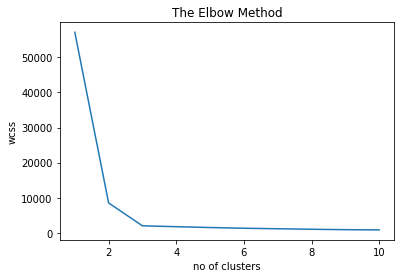

In [8]:
X= dataset.iloc[:, [0,1]].values
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()


Number of data points in each cluster= 
 0    334
1    333
2    333
Name: Cluster, dtype: int64


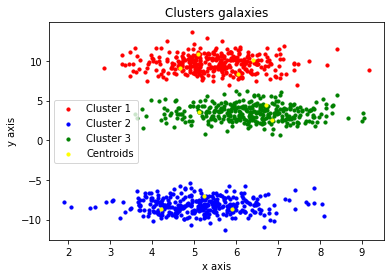

In [11]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
kmeans.fit(X)
pred = kmeansmodel.fit_predict(X)

dataset['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', dataset['Cluster'].value_counts())

#Visualizing all the clusters 
plt.scatter(X[pred  == 0, 0], X[pred  == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred  == 1, 0], X[pred  == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred  == 2, 0], X[pred  == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 10 , c = 'yellow', label = 'Centroids')
plt.title('Clusters galaxies')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.show()

In [13]:
red_galaxy = X[pred == 0, 0], X[pred == 0, 1]
type(red_galaxy)
list_coord = list(red_galaxy)
#print(list_coord[0],list_coord[1])

centroids= pd.DataFrame({'x': kmeans.cluster_centers_[:, 0], "y": kmeans.cluster_centers_[:, 1] })
redcentroids= centroids[centroids.y >5]
type(redcentroids)
list_centroids = list(redcentroids.values)
list_centroids 

[array([6.05373939, 8.39809228]),
 array([ 5.08604709, 10.83565582]),
 array([4.66836158, 9.12873039]),
 array([ 6.40404757, 10.11037187])]

In [44]:
red_galaxy_Xvalues = X[pred == 0, 0]
red_galaxy_Yvalues = X[pred == 0, 1]
redgalaxydf= pd.DataFrame({'x': red_galaxy_Xvalues , 'y': red_galaxy_Yvalues })


def round_decimals_down(number:float, decimals:int=2):
    """
    Returns a value rounded down to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.floor(number)
    factor = 10 ** decimals
    return math.floor(number * factor) / factor

# finding the max x values cordinate and corresponding y value
print(redgalaxydf.iloc[redgalaxydf['x'].idxmax(axis=0)])
x1= redgalaxydf.iloc[redgalaxydf['x'].idxmax(axis=0)]
print("The required coordinates after rounding off")
print(round_decimals_down(x1[0],2),round_decimals_down(x1[1],2) )   # rounding off

x    9.160857
y    8.807259
Name: 62, dtype: float64
The required coordinates after roundingoff
9.16 8.8


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5c003a9-88bc-4761-b61e-147bf2ede907' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>